# Problem 1: Finding the optimal $k$ and bootstrap iterations

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
!pip install -q gdown httpimport
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

##Preprocessing the MNIST dataset
We normalize the pixel values and select a random 10% subset of the dataset.

In [ ]:
with np.load('mnist.npz') as data:
    X_train = data['train_data']/255
    y_train = data['train_labels']
    X_test = data['train_data']/255
    y_test = data['train_labels']

In [ ]:
sample_size = int(0.1*len(X_train))
idx = np.random.choice(len(X_train), sample_size, replace=False)
X_train = X_train[idx]
y_train = y_train[idx]

## *bootstrapKNN* function

In [ ]:
def bootstrapKNN(k, iter):
  accuracy = []
  n_samples = len(X_train)
  for i in range(iter):
     bootstrap_idx = np.random.choice(np.arange(n_samples), size=n_samples, replace=True)
     X_bs, y_bs = X_train[bootstrap_idx], y_train[bootstrap_idx]
     oob_idx = np.setdiff1d(np.arange(n_samples), bootstrap_idx)
     X_oob, y_oob = X_train[oob_idx], y_train[oob_idx]
     KNN = KNeighborsClassifier(n_neighbors=k)
     KNN.fit(X_bs.reshape(-1,28*28), y_bs)
     y_pred = KNN.predict(X_oob.reshape(-1,28*28))
     accuracy.append((y_oob==y_pred).mean())
  return accuracy

## Different number of bootstrap iterations
Evaluating the appropriate number of iterations for bootstrap: we examine this for $k = 2$ and $k = 10$.

In [ ]:
b_2 = bootstrapKNN(2,100)
b_10 = bootstrapKNN(10,100)

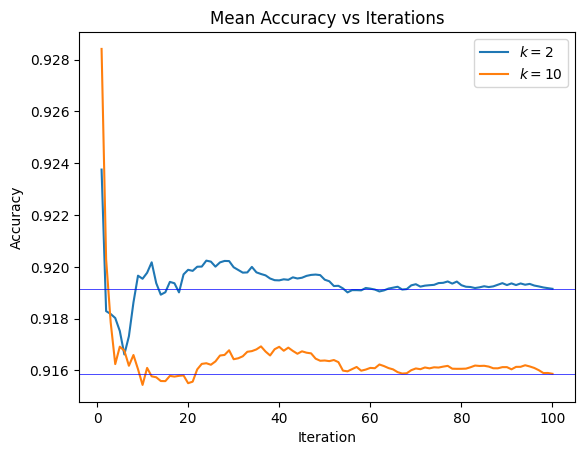

In [ ]:
mean_accuracy_b2 = [np.mean(b_2[:i+1]) for i in range(len(b_2))]
mean_accuracy_b10 = [np.mean(b_10[:i+1]) for i in range(len(b_10))]
iterations = np.arange(1, len(b_2) + 1)
plt.plot(iterations, mean_accuracy_b2, label = "$k=2$")
plt.plot(iterations, mean_accuracy_b10,label="$k=10$")

plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.axhline(np.mean(b_2), color='b',linewidth=0.5)
plt.axhline(np.mean(b_10), color='b',linewidth=0.5)
plt.title('Mean Accuracy vs Iterations')
plt.legend()
plt.show()

We observe that, overall, accuracy differences between iterations become small for $i>10$ with variations of around 0.005. Based on these two plots, we can assume that around 55 bootstrap iterations are needed for the accuracy to stabilize – beyond this point, the changes are minimal.

#Determining optimal $k$

In [ ]:
accuracies_for_k = []
for k in range(1,11):
  accuracies_for_k.append(bootstrapKNN(k,55))

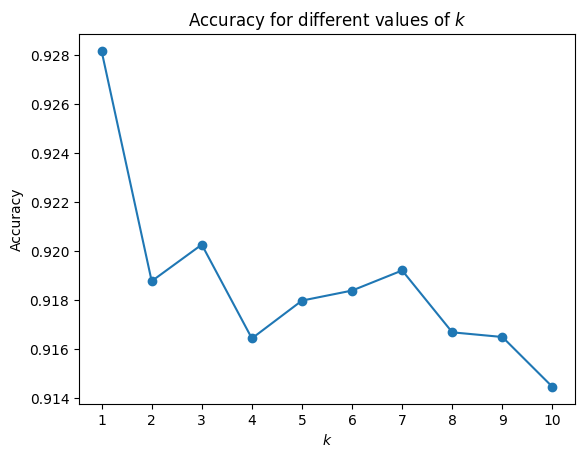

In [ ]:
mean_acc =np.mean(accuracies_for_k, axis=1)
plt.plot(range(1,11), mean_acc,marker='o', linestyle='-')
plt.xlabel('$k$')
plt.ylabel('Accuracy')
plt.title('Accuracy for different values of $k$')
plt.xticks(ticks=range(1,11))
plt.show()

We observe the highest accuracy at $k=1$. However, this may be due to overfitting, so it's best to avoid choosing this number of neighbors. Notably, the accuracy stabilizes for $k$ values between 4 and 9, with only minor variations. Therefore, an optimal choice might be $k=5$, as it offers a balance between good accuracy (around 0.92) and a reduced risk of overfitting.